In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/usr/local/lib/python3.8/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [3]:
from mesh_tools import trimesh_utils as tu
from python_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
neurd.set_volume_params(
    volume = "microns"
)

# Data Prep: Loading mesh

In [6]:
from mesh_tools import trimesh_utils as tu

In [7]:
segment_id = 864691136105780441

In [8]:
mesh_filepath = f"./{segment_id}.off"
mesh = tu.load_mesh_no_processing(mesh_filepath)
mesh

<trimesh.Trimesh(vertices.shape=(1217827, 3), faces.shape=(2422136, 3))>

# Step 1: Decimation

In [ ]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_2_Decimation_v1.ipynb

In [ ]:
decimation_kwargs = dict(
    decimation_ratio =0.25,
)

In [ ]:
mesh_dec = tu.decimate(
    mesh,
    **decimation_kwargs
)

In [ ]:
print(f"mesh = {mesh}")
print(f"mesh_dec = {mesh_dec}")

In [ ]:
ipvu.plot_objects(
    meshes = [mesh,mesh_dec],
    meshes_colors=["green","red"],
)

# Step 2: Some Identification

In [ ]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_3_MeshFragment_full_v1.ipynb

In [ ]:
from neurd import soma_extraction_utils as sm
sm.output_global_parameters_nuclei()

In [ ]:
mesh_dec = mesh

In [ ]:
(total_soma_list, 
 run_time, 
 total_soma_list_sdf,
 glia_pieces,
 nuclei_pieces) = sm.extract_soma_center(
    segment_id,
    mesh = mesh_dec,
    return_glia_nuclei_pieces=True,
    verbose = True,
)

In [ ]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_extraction_meshes(
    mesh_dec,
    total_soma_list,
    glia_pieces,
    nuclei_pieces,
    verbose = True,
)

# Step 3: Decomposition

In [ ]:
from neurd import neuron

In [ ]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_4_Decomposition_full_v1.ipynb

In [ ]:
neurd.set_volume_params(
    volume = "microns"
)

In [ ]:
somas = [
 total_soma_list, 
 run_time, 
 total_soma_list_sdf,
]

In [ ]:
neuron_obj = neuron.Neuron(
    mesh = mesh,
    somas = somas,
    suppress_preprocessing_print=False,
    suppress_output=False,
    glia_meshes=glia_pieces,
    nuclei_meshes = nuclei_pieces,
)

In [ ]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)

# Step 3.5: Save off neuron

In [ ]:
from neurd import neuron_utils as nru

filepath = nru.save_compressed_neuron(
    neuron_obj,
    output_folder = "./",
    file_name = f"large_double_soma",
    return_file_path = True,
)

# Step 3.6: Load the Neuron

In [10]:
from neurd import neuron_utils as nru

neuron_obj = nru.decompress_neuron(
    filepath = "./large_double_soma.pbz2",
    original_mesh = mesh,
    
)

neuron_obj

Decompressing Neuron in minimal output mode...please wait


# Step 4: Multi-Touch or Multi-Soma Merge Suggestions

In [11]:
from neurd import proofreading_utils as pru

neurd.set_volume_params(
    "microns"
)

In [12]:
plot_intermediates = False
plot_suggestions = False
plot_cut_coordinates = False
only_multi_soma_paths = False
verbose = True

multi_soma_limbs = [0 5]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[ 7 40]
 [ 7 44]
 [40 44]]


---- working on disconnecting 7 and 40
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [7, 9, 64, 42, 38, 40]
remove_segment_threshold = 1500
high_degree_endpoint_coordinates_tried = []
consider_path_neighbors_for_removal is set so segments_to_consider = [ 8  9 34 38 39 42 63 64 72 73 74]
Short segments to combine = [74]


-------- Removing Segments -------------
curr_short_seg_revised = 74
np.sum(touch_len>0) = 1
Using ONE stitch point
touching_endpoints = [[1398837.38591185  647849.69611765  681879.74986026]
 [1399070.          648278.          681473.        ]]
new_stitch_point = [1399070.  648278.  681473.]
Revised cut path = [ 7  9 64 42 38 40]

-------- Done Removing

  0%|          | 0/5 [00:00<?, ?it/s]

  Edge: [7 9]: curr_angle = 44.71
  Edge: [ 9 64]: curr_angle = 169.66
  Edge: [64 42]: curr_angle = 28.89
  Edge: [42 38]: curr_angle = 36.1
  Edge: [38 40]: curr_angle = 89.05
Total time for doubling_back = 0.21726512908935547
There were 1 edges that passed doubling back threshold of 110
Winning edge [ 9 64] had a doubling back of 169.65773631292683
skip_nodes = []
inside resolve_crossover_at_end at end: 
current edges_to_delete = [array([ 9, 64])] 
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1447260.  647254.  645201.]
coordinate_branches = [9, 64, 72, 73]
9 = red
64 = aqua
72 = purple
73 = green
edges_to_avoid= [array([ 9, 64])]
Skipping edge: [9, 64] because in edges_to_avoid 
Angle between 9 and 72 = 69.79 
Angle between 9 and 73 = 19.38 
width_diff = 13.411975555172546

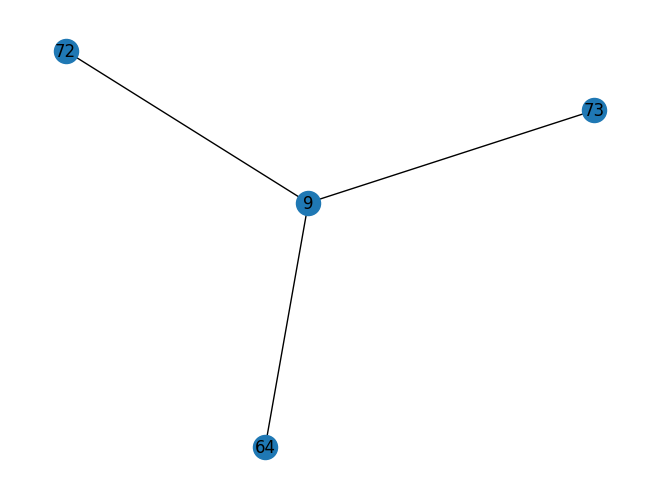

match_branches = [[64, 73]]
branches_to_avoid= [ 7 40 44]
72: No Pair so adding back old edge
72: Old neighbors = [9]
new_neighbors = [[9, 72]]
edges_to_delete (resolve crossover) = [[9, 64], [9, 73], [64, 72], [72, 73]]
edges_to_create (resolve crossover) = [[64, 73], [9, 72]]
After Resolving crossovers at end: 
edges_to_delete_new = [[9, 64], [9, 73], [64, 72], [72, 73]]
edges_to_create_new = [[64, 73], [9, 72]]
edges_to_delete (cut_limb_network) = [array([ 9, 64]), array([ 9, 73]), array([64, 72]), array([72, 73])]
edges_to_create = [[64, 73], [9, 72]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73}
Comp 1 = {72, 9, 8, 7}
Comp 2 = {74}
curr_limb_copy.deleted_edges = [array([ 9, 64]), array([ 9, 73]), array([64, 72]), 

error_branches=[ 0  1  2  3  4  5  6 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73]
valid_upstream_branches_restriction = [72, 9, 8, 7]
Error Branches = [ 0  1  2  3  4  5  6 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73]

**conn_comp_errors = [[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], [73]]
Grouping all conn comp together

**conn_comp_errors AFTER PAIRING = [[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3

point_array= [[1445596.44997291  647279.59299079  645351.49151978]
 [1444088.84585687  647505.47849369  645675.8405021 ]]
Deciding between min_cancel_distance = 1558.5559641748782, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1558.5559641748782
blue 9 node offset skeleton coordinate is [1445596.44997291  647279.59299079  645351.49151978]
 --> using closest_mesh_face method curr_points = [[1445575.          647109.6         645462.53333333]]
blue 9 node offset skeleton coordinate is [1444088.84585687  647505.47849369  645675.8405021 ]
 --> using closest_mesh_face method curr_points = [[1444114.  647626.  645757.]]
point_array= [[1447079.22988205  648103.12038639  645696.62393324]
 [1446835.82127399  648919.95785264  646168.36160816]
 [1445844.2106438   648900.48609962  646101.1643533 ]]
Deciding between min_cancel_distance = 974.1702267479463, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 64 node offset skeleton coordinat

  0%|          | 0/5 [00:00<?, ?it/s]

  Edge: [40 39]: curr_angle = 69.78
  Edge: [39 56]: curr_angle = 142.6
  Edge: [56 50]: curr_angle = 54.73
  Edge: [50 48]: curr_angle = 16.47
  Edge: [48 46]: curr_angle = 37.53
Total time for doubling_back = 0.17569422721862793
There were 1 edges that passed doubling back threshold of 110
Winning edge [39 56] had a doubling back of 142.59825538791517
Skipping endnode 44 because skeletal distance was 1410.6368569885076 and threshold was 2500
skip_nodes = [44]
inside resolve_crossover_at_end at end: 
current edges_to_delete = [array([39, 56])] 
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1410745.7239172   644747.74542943  730320.07832555]
coordinate_branches = [39, 56, 60, 61]
39 = red
56 = aqua
60 = purple
61 = green
edges_to_avoid= [array([39, 56])]
Skipping edge: [39, 56]

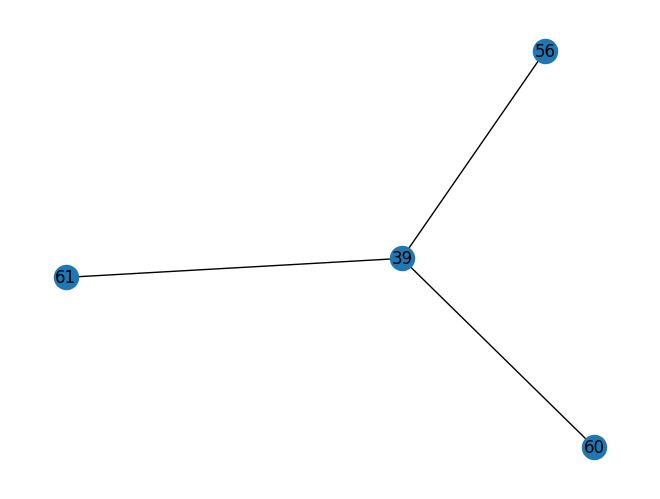

match_branches = [[39, 60], [56, 61]]
branches_to_avoid= [ 7 40 44]
new_neighbors = []
edges_to_delete (resolve crossover) = [[39, 56], [39, 61], [56, 60], [60, 61]]
edges_to_create (resolve crossover) = [[39, 60], [56, 61]]
After Resolving crossovers at end: 
edges_to_delete_new = [[39, 56], [39, 61], [56, 60], [60, 61]]
edges_to_create_new = [[39, 60], [56, 61]]
edges_to_delete (cut_limb_network) = [array([39, 56]), array([39, 61]), array([56, 60]), array([60, 61])]
edges_to_create = [[39, 60], [56, 61]]
Number of connected components = 4
Comp 0 = {0, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 54, 58, 60, 62, 63, 64, 69, 73}
Comp 1 = {1, 2, 3, 13, 24, 36, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 59, 61, 65, 66, 67, 68, 70, 71}
Comp 2 = {8, 9, 72, 7}
Comp 3 = {74}
curr_limb_copy.deleted_edges = [array([ 9, 64]), array([ 9, 73]), array([64, 72]), array([72, 73]), array([39, 56]), array(

point_array= [[1410071.66533565  644891.04454611  729737.54957979]
 [1409508.44321301  644807.68368381  728919.43981013]
 [1409070.4218075   644744.57200227  728026.65266158]]
Deciding between min_cancel_distance = 996.4510668529086, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 39 node offset skeleton coordinate is [1410071.66533565  644891.04454611  729737.54957979]
 --> using closest_mesh_face method curr_points = [[1409953.          645017.16666667  729775.46666667]]
red 39 node offset skeleton coordinate is [1409508.44321301  644807.68368381  728919.43981013]
 --> using closest_mesh_face method curr_points = [[1409476.66666667  644862.5         728902.33333333]]
red 39 node offset skeleton coordinate is [1409070.4218075   644744.57200227  728026.65266158]
 --> using closest_mesh_face method curr_points = [[1408898.   644706.1  727894.4]]

downstream_errors = []
For Pair 1: coordinate [[1410745.7239172   644747.74542943  730320.07832555]]
point

point_array= [[1409666.29524246  644835.64074577  729171.46700814]
 [1408918.51069164  644713.19741424  727657.98372827]]
Deciding between min_cancel_distance = 1692.573703657305, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1692.573703657305
blue 39 node offset skeleton coordinate is [1409666.29524246  644835.64074577  729171.46700814]
 --> using closest_mesh_face method curr_points = [[1409611.66666667  644865.03333333  729135.9       ]]
blue 39 node offset skeleton coordinate is [1408918.51069164  644713.19741424  727657.98372827]
 --> using closest_mesh_face method curr_points = [[1408950.66666667  644787.5         727574.86666667]]
point_array= [[1410756.45428533  644668.17801575  729501.75773346]
 [1410394.54174852  644934.1356589   728613.12932156]
 [1409997.5408649   645372.05245358  727811.53430965]]
Deciding between min_cancel_distance = 995.67796334676, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 56 node off

  0%|          | 0/4 [00:00<?, ?it/s]

  Edge: [9 5]: curr_angle = 36.11
  Edge: [5 4]: curr_angle = 149.5
  Edge: [ 4 11]: curr_angle = 44.38
  Edge: [11 10]: curr_angle = 11.69
Total time for doubling_back = 0.21018528938293457
There were 1 edges that passed doubling back threshold of 110
Winning edge [5 4] had a doubling back of 149.50343626318676
skip_nodes = []
inside resolve_crossover_at_end at end: 
current edges_to_delete = [array([5, 4])] 
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1324550.  675465.  661108.]
coordinate_branches = [3, 4, 5]
3 = red
4 = aqua
5 = purple
edges_to_avoid= [array([5, 4])]
Angle between 3 and 4 = 59.6 
width_diff = 246.00609397268028, width_diff_perc = 0.5091925900090718

Angle between 3 and 5 = 45.27 
width_diff = 68.93566156317405, width_diff_perc = 0.12486864568845588

Skipp

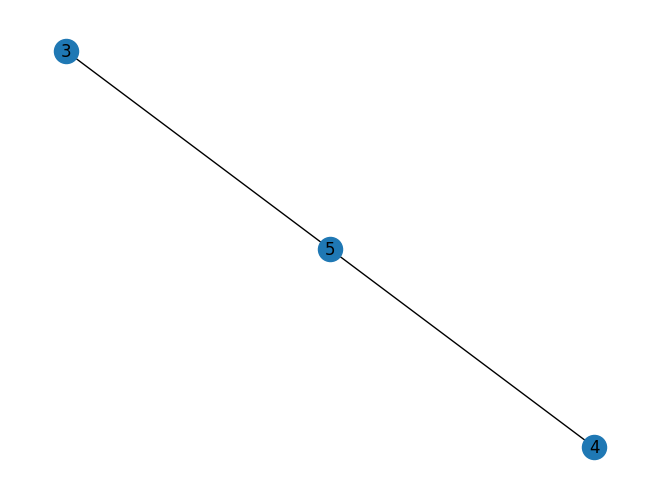

match_branches = [[3, 5]]
branches_to_avoid= [ 9 10]
new_neighbors = []
edges_to_delete (resolve crossover) = [[3, 4], [4, 5]]
edges_to_create (resolve crossover) = [[3, 5]]
After Resolving crossovers at end: 
edges_to_delete_new = [[3, 4], [4, 5]]
edges_to_create_new = [[3, 5]]
edges_to_delete (cut_limb_network) = [array([3, 4]), array([4, 5])]
edges_to_create = [[3, 5]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 5, 6, 7, 8, 9}
Comp 1 = {10, 2, 11, 4}
Comp 2 = {12}
curr_limb_copy.deleted_edges = [array([3, 4]), array([4, 5])]
curr_limb_copy.created_edges = [[3, 5]]
After get best cut: cut_edges = [array([3, 4]), array([4, 5])], added_edges = [[3, 5]]
edge_diff = [[3 4]
 [4 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


**** Computing red blue splits*

point_array= [[1325406.61449539  675325.03130277  659668.03844656]
 [1326054.32145826  675057.50405958  658229.00248527]]
Deciding between min_cancel_distance = 1600.5997730456186, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1600.5997730456186
blue 5 node offset skeleton coordinate is [1325406.61449539  675325.03130277  659668.03844656]
 --> using closest_mesh_face method curr_points = [[1325257.          675580.1         659582.46666667]]
blue 5 node offset skeleton coordinate is [1326054.32145826  675057.50405958  658229.00248527]
 --> using closest_mesh_face method curr_points = [[1326048.66666667  675311.53333333  657883.26666667]]
point_array= [[1324601.52247536  674506.45170107  661388.23221117]
 [1324595.39751453  673588.06489039  661184.07672424]
 [1324530.50325628  672801.89752778  660572.93865239]]
Deciding between min_cancel_distance = 940.8248041024273, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 4 node of

In [13]:
(split_results,
red_blue_split_results) = pru.multi_soma_split_suggestions(
    neuron_obj,
    plot_intermediates=plot_intermediates,
    plot_suggestions=plot_suggestions,
    plot_cut_coordinates = plot_cut_coordinates,
    only_multi_soma_paths=only_multi_soma_paths,
    default_cut_edge = "last",
    verbose = verbose,
    output_red_blue_suggestions = True,
    split_red_blue_by_common_upstream = True,
    apply_valid_upstream_branches_restriction = True,
    debug_red_blue = False,
)

In [29]:
from neurd import soma_splitting_utils as ssu
ssu.plot_red_blue_split_suggestions_per_limb(
    neuron_obj,
    red_blue_split_results,
    split_results = split_results,
)



-------- Suggestions for Limb 0------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…



-------- Suggestions for Limb 5------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [28]:
debug

> /neurd_packages/python_tools/python_tools/ipyvolume_utils.py(1866)<listcomp>()
   1864 
   1865     # --- 6/10: Making sure all scatters are numpy arrays ---
-> 1866     scatters = [np.array(s).reshape(-1,3) for s in scatters]
   1867 
   1868 

ipdb> scatters
*** NameError: name 'scatters' is not defined
ipdb> u
> /neurd_packages/python_tools/python_tools/ipyvolume_utils.py(1866)plot_objects()
   1864 
   1865     # --- 6/10: Making sure all scatters are numpy arrays ---
-> 1866     scatters = [np.array(s).reshape(-1,3) for s in scatters]
   1867 
   1868 

ipdb> scatters
[array([[1447260.        ,  647254.        ,  645201.        ],
       [1410745.7239172 ,  644747.74542943,  730320.07832555]]), array([[1446995.33333333,  648346.2       ,  646135.76666667],
       [1445329.66666667,  648863.16666667,  646008.06666667],
       [1448692.        ,  648662.        ,  646555.        ],
       [1450305.33333333,  648608.9       ,  646566.63333333],
       [1410416.        ,  644803.933

ipdb> c


# Step 5: Splitting Multi-Neuron

In [25]:
import numpy as np
from neurd import soma_splitting_utils as ssu

return_total_coordinates = True
split_results = split_results

{0: {'paths_to_cut': array([[1359610.        ,  653867.        ,  627225.        ],
         [1361157.63648345,  653336.28828259,  626107.31158561],
         [1362686.14345149,  652921.61273847,  624905.13863145],
         [1364428.50310936,  652328.55447141,  624150.08856969],
         [1365890.        ,  652230.        ,  623502.        ],
         [1367639.87104072,  651968.69613122,  624366.5929638 ],
         [1369373.10646646,  651696.16794866,  624793.25685638],
         [1371215.14823261,  651617.1020086 ,  625539.88492238],
         [1373116.00490304,  651397.89843716,  625801.00030644],
         [1374943.53966642,  651196.6106013 ,  625723.28317331],
         [1376795.7331421 ,  650994.81733839,  626169.31680361],
         [1378691.80216167,  650711.4593515 ,  626481.22771773],
         [1380388.26150604,  650425.18407583,  627347.81373353],
         [1382078.21882008,  650456.04269354,  628311.09273092],
         [1383834.23336291,  650128.83154051,  629130.44284349],
      

In [ ]:
from neurd import spine_utils as spu
from neurd import neuron_utils as nru

In [43]:
from neurd import proofreading_utils as pru

neurd.set_volume_params(
    "microns"
)

In [63]:
n_paths_cut = pru.get_n_paths_cut(
    split_results,
    verbose = True)

n_paths_multi_soma = 2
n_paths_multi_touch = 1
n_paths_cut = 3


In [46]:
neuron_list_errored_limbs_area

[[], []]

In [44]:
verbose = True

(neuron_list,
neuron_list_errored_limbs_area,
neuron_list_errored_limbs_skeletal_length,
neuron_list_n_multi_soma_errors,
neuron_list_n_same_soma_errors) = pru.split_neuron(neuron_obj,
    limb_results=split_results,
    verbose=verbose,
    return_error_info=True,
)

multiplicity = len(neuron_list)

using precomputed split suggestions


---Working on Splitting Limb 0 with 4 components----


----Working on seperate_graph 0----


---------Working on soma_idx = 1, soma_group_idx 0, endpt = [1398182.02941176  650608.92647059  682890.33823529]---------
Starting_edge inside branches_to_conept = [[1397898.1258125   647882.61210588  683145.06467108]
 [1398182.02941176  650608.92647059  682890.33823529]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [22]
printing out current edge:
[[1398182.02941176  650608.92647059  682890.33823529]
 [1397898.1258125   647882.61210588  683145.06467108]]
edge_endpoints_to_process was empty so exiting loop after 42 iterations
starting_node in concept map (that should match the starting edge) = 31
Total time for branches to concept conversion = 0.5505995750427246

Done generating concept network 




----Working on seperate_graph 1----


---------Working on soma_idx = 1, soma_group_idx 0, endpt = [1402440.  

curr_limb_concept_networks= {0: [<python_tools.networkx_utils.GraphOrderedEdges object at 0x7f733ca347c0>]}
curr_limb_concept_networks= {0: [<python_tools.networkx_utils.GraphOrderedEdges object at 0x7f733ca2d7f0>]}
curr_limb_concept_networks= {0: [<python_tools.networkx_utils.GraphOrderedEdges object at 0x7f733ca37fa0>]}
curr_limb_concept_networks= {0: [<python_tools.networkx_utils.GraphOrderedEdges object at 0x7f733ca37790>]}
curr_limb_concept_networks= {0: [<python_tools.networkx_utils.GraphOrderedEdges object at 0x7f734c1654f0>]}
--- 4) Finshed generating Limb objects and adding them to concept graph: 3.2848715782165527
--- 5) SKIPPING Doing the adaptive mesh correspondence on the meshparty preprocessing ---
--- 6) SKIPPING Using the computed_attribute_dict to populate neuron attributes ---
self.n_limbs = 6
7) Calculating the spines for the neuorn if do not already exist
Total time for neuron instance creation = 12.561912536621094


Number of seperate neuron objects = 2
Filter limb

In [50]:
ipvu.plot_objects(
    mesh
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [48]:
nviz.visualize_neuron(
    neuron_list[0],
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [51]:
nviz.visualize_neuron(
    neuron_list[1],
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Cell Typing

In [52]:
n_obj = neuron_list[0]
n_obj


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

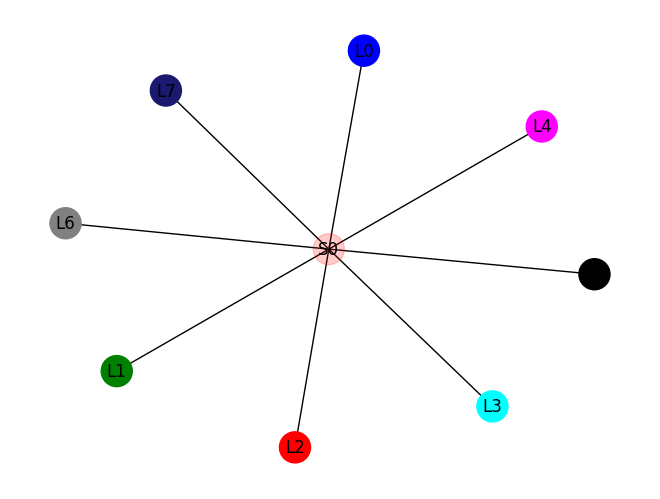

In [53]:
nviz.visualize_neuron_limbs(n_obj)

In [30]:
from neurd import microns_volume_utils as mvu

data_type = "microns"


verbose = True
dataset = data_type
plotting = False#test_mode
voxel_adjustment_vector = mvu.voxel_to_nm_scaling
inh_exc_class_to_use_for_axon = "baylor"

plot_initial_neuron = False
plot_synapses = False
plot_spines = False
plot_spines_and_sk_filter_for_syn  = False
plot_spines_and_sk_filter_for_spine = False
plot_aligned_neuron = False


#----- complete axon processing --------
plot_initial_axon=False
plot_axon_on_dendrite=False
plot_high_fidelity_axon = False
plot_boutons_web = False

# ---- after axon finding ----
plot_unaligned_synapses = False
plot_unaligned_axon = False


# ------for the prep work of simplifying-------- 
filter_low_branch_cluster_dendrite = False
recalculate_width = False
plot_limb_branch_filter_away_low_branch = False

plot_floating_end_nodes_limb_branch_dict = False
plot_downstream_path_limb_branch = False

In [54]:
stats_dict = n_obj.neuron_stats(
    stats_to_ignore = [
        "n_boutons",
        "axon_length",
        "axon_area",
        "max_soma_volume",
        "max_soma_n_faces",
    ],
    include_skeletal_stats = True,
    include_centroids= True,
    voxel_adjustment_vector=voxel_adjustment_vector,
)

stats_dict

Total Number of Branches = 142
n_short_branches = 43, n_medium_branches = 79, n_long_branches = 20
axon_length = 6058.998800711367, axon_branch_length_median = 15.847926678107179, axon_branch_length_mean = 42.66900563881244
bbox_volume = 233.5957141798006
bbox_corners = [[ 701378.72641678  422497.          593929.        ]
 [1487160.         1027041.92310751 1085667.9588849 ]]
bbox_corners_soma_relative = [[-650452.65427159 -234937.2375468   -39347.52555084]
 [ 135328.61931164  369607.6855607   452391.43333406]]


{'n_vertices': 658896,
 'n_faces': 1312084,
 'max_soma_area': 764.6708658212981,
 'n_not_processed_soma_containing_meshes': 0,
 'n_error_limbs': 0,
 'n_same_soma_multi_touching_limbs': 0,
 'n_multi_soma_touching_limbs': 0,
 'n_somas': 1,
 'n_limbs': 8,
 'n_branches': 144,
 'max_limb_n_branches': 69,
 'skeletal_length': 5973917.695323767,
 'max_limb_skeletal_length': 2757599.769741061,
 'median_branch_length': 13949.362,
 'width_median': 250.73,
 'width_no_spine_median': 244.333,
 'width_90_perc': 640.17,
 'width_no_spine_90_perc': 628.232,
 'n_spines': 1378,
 'spine_density': 0.00023066939825412455,
 'spines_per_branch': 9.569444444444445,
 'skeletal_length_eligible': 5365402.239,
 'n_spine_eligible_branches': 92,
 'spine_density_eligible': 0.0002568306976098833,
 'spines_per_branch_eligible': 14.978,
 'total_spine_volume': 132243959484.67453,
 'spine_volume_median': 55768931.03500874,
 'spine_volume_density': 22136.890099472206,
 'spine_volume_density_eligible': 24647.538729420976,
 '

In [57]:
from neurd import branch_utils as bu
bu.refine_width_array_to_match_skeletal_coordinates(
                n_obj,
                verbose = True
)

limb branch to update = {}


----Working on width: median_mesh_center-----
width_name BEFORE processing = median_mesh_center
After processing
width_name = median_mesh_center, distance_by_mesh_center= True, no_spines = False, summary_measure= median
Time for calculating median_mesh_center: 4.673004150390625e-05


----Working on width: no_spine_median_mesh_center-----
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Time for calculating no_spine_median_mesh_center: 1.5497207641601562e-05


In [59]:
# -- a0) Prep work: Recompute the Widths --
from neurd import neuron_simplification as nsimp


neuron_obj_pre_filt_after_simp = nsimp.branching_simplification(
    n_obj,
    return_copy = True,

    #floating endpiece arguments
    plot_floating_end_nodes_limb_branch_dict = plot_floating_end_nodes_limb_branch_dict,
    plot_final_neuron_floating_endpoints = False,

    # combine path arguments
    plot_downstream_path_limb_branch = plot_downstream_path_limb_branch,
    plot_final_neuron_path = False,

    verbose = verbose,
)

N_branches on limbs before simplification
L0: 45
L1: 69
L2: 7
L3: 8
L4: 5
L5: 3
L6: 3
L7: 4
--- STARTING merge_floating_end_nodes_to_parent----

---Working on limb L0, deleting [34, 36, 38, 40, 42, 43, 44]
new_node_name_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: -1, 35: 34, 36: -2, 37: 35, 38: -3, 39: 36, 40: -4, 41: 37, 42: -5, 43: -6, 44: -7}
Finished relabeling nodes
AFter relabeling branch names: [-7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
After branch deletion, names: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Current starting node BEFORE reset: 29
Current starting node after reset: 29
Total time fo

In [60]:
neuron_obj, filtering_info_low_branch = pru.apply_proofreading_filters_to_neuron(
    input_neuron = neuron_obj_pre_filt_after_simp,
    filter_list = [pru.low_branch_length_clusters_dendrite_filter],
    plot_limb_branch_filter_with_disconnect_effect=False,
    plot_limb_branch_filter_away=plot_limb_branch_filter_away_low_branch,
    plot_final_neuron=False,

    return_error_info=True,
    verbose=False,
    verbose_outline=verbose)


--- Working on filter 0:
function = low_branch_length_clusters_dendrite
function __name__ = filter_away_low_branch_length_clusters_dendrite
function arguments = {}


limb_branch_dict_to_cancel = {}



 ---- Total time for applying filter: 37.44728970527649 -----


In [62]:
from neurd import width_utils as wu
neuron_obj= wu.neuron_width_calculation_standard(
    neuron_obj,
    verbose = True
)



----Working on width: median_mesh_center-----
width_name BEFORE processing = median_mesh_center
After processing
width_name = median_mesh_center, distance_by_mesh_center= True, no_spines = False, summary_measure= median
Working on limb L0 branch 10
    current_width= 542.8525168752552
Working on limb L0 branch 2
    current_width= 367.1182085193019
Working on limb L0 branch 5
    current_width= 476.3542381773993
Working on limb L0 branch 9
    current_width= 475.9558011909874
Working on limb L0 branch 0
    current_width= 332.3072469140322
Working on limb L0 branch 4
    current_width= 82.3606889884432
Working on limb L0 branch 1
    current_width= 449.1674677084153
Working on limb L0 branch 3
    current_width= 428.5928439510641
Working on limb L0 branch 7
    current_width= 374.0453356177695
Working on limb L0 branch 6
    current_width= 90.45336789074759
Working on limb L0 branch 8
    current_width= 129.37829711679225
Working on limb L0 branch 11
    current_width= 95.86006214028

    current_width= 745.6503727267374
Working on limb L0 branch 13
    current_width= 726.492493568434
Working on limb L0 branch 12
    No spines and using precomputed width: 90.121699781038
Working on limb L0 branch 17
    current_width= 889.9572695169531
Working on limb L0 branch 16
    No spines and using precomputed width: 80.82013830879164
Working on limb L0 branch 15
    current_width= 711.1162247523862
Working on limb L0 branch 20
    current_width= 621.2963629370915
Working on limb L0 branch 19
    No spines and using precomputed width: 113.95213010788565
Working on limb L0 branch 18
    No spines and using precomputed width: 914.4604134844355
Working on limb L0 branch 24
    No spines and using precomputed width: 503.62312718718897
Working on limb L0 branch 23
    No spines and using precomputed width: 1064.381012927217
Working on limb L0 branch 22
    No spines and using precomputed width: 79.66178332942401
Working on limb L0 branch 21
    No spines and using precomputed width

In [ ]:
from neurd import synapse_utils as syu
from neurd import spine_utils as spu

neuron_obj = syu.add_synapses_to_neuron_obj(
    neuron_obj,
    validation = False,
    verbose  = verbose,
    original_mesh = None,
    plot_valid_error_synapses = False,
    calculate_synapse_soma_distance = False,
    add_valid_synapses = True,
    add_error_synapses=False,
)

neuron_obj = spu.add_head_neck_shaft_spine_objs(
    neuron_obj,
    verbose = verbose
)
                

In [64]:
from python_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    scatters=[np.random.rand(10,3)],
    zoom_radius=1,
    axis_box_off=False,
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [65]:
import ipyvolume as ipv

N = 1000
x,y,z = np.random.normal(0,1,(3,N))

fig = ipv.figure()
scatter = ipv.scatter(x,y,z)
ipv.show()

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# How to save derivedd attributes